In [1]:
import os
import cv2
import json

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from tqdm import tqdm
import warnings

In [2]:
warnings.filterwarnings(action='ignore')

In [3]:
img_train_path = '../../data/train/JPEGImages'
img_val_path = '../../data/val/JPEGImages'

In [4]:
# 확장자 종류 확인
ext = set() 
for p in os.listdir(img_train_path):
    ext.add(p.split('.')[-1])
for p in os.listdir(img_val_path):
    ext.add(p.split('.')[-1])
print(f'ext : {ext}')

ext : {'json', 'jpg'}


In [5]:
# image, json filename을 list로 저장
img_train_list = []
json_train_list = []
img_val_list = []
json_val_list = []
for p in os.listdir(img_train_path):
    if p.split('.')[-1] == 'jpg':
        img_train_list.append(p)
    elif p.split('.')[-1] == 'json':
        json_train_list.append(p)
for p in os.listdir(img_val_path):
    if p.split('.')[-1] == 'jpg':
        img_val_list.append(p)
    elif p.split('.')[-1] == 'json':
        json_val_list.append(p)
# data 개수 확인
print(f'# of train : {len(img_train_list)}')
print(f'# of val : {len(img_val_list)}')

# of train : 3398
# of val : 577


In [6]:
# json과 img 대응이 잘 되는지 확인
cnt_train = 0
cnt_val = 0
for i in img_train_list:
    if ''.join(i.split('.')[:-1])+'.json' not in json_train_list:
        cnt_train += 1
for i in img_val_list:
    if ''.join(i.split('.')[:-1])+'.json' not in json_val_list:
        cnt_val += 1
print(f'# of train_mismatch : {cnt_train}')
print(f'# of val_mismatch : {cnt_val}')

# of train_mismatch : 0
# of val_mismatch : 0


In [7]:
# train/val img의 filename, width, height, mean(BGR), std(BGR) 확인
train_info = {'filename' : [], 'width' : [], 'height' : [],'mean' : [], 'std' : []}
val_info = {'filename' : [], 'width' : [], 'height' : [],'mean' : [], 'std' : []}
for p in tqdm(img_train_list):
    img = cv2.imread(os.path.join(img_train_path,p))
    train_info['filename'].append(p)
    train_info['width'].append(img.shape[1])
    train_info['height'].append(img.shape[0])
    train_info['mean'].append(img.mean(axis=(0,1)))
    train_info['std'].append(img.std(axis=(0,1)))
for p in tqdm(img_val_list):
    img = cv2.imread(os.path.join(img_val_path,p))
    val_info['filename'].append(p)
    val_info['width'].append(img.shape[1])
    val_info['height'].append(img.shape[0])
    val_info['mean'].append(img.mean(axis=(0,1)))
    val_info['std'].append(img.std(axis=(0,1)))
train_df = pd.DataFrame(train_info)
val_df = pd.DataFrame(val_info)

100%|██████████| 577/577 [00:48<00:00, 11.93it/s]


In [8]:
train_part = []
train_oil = []
train_sen = []
train_pig = []
train_wri = []
train_hyd = []
for idx, train_f in enumerate(train_df['filename']):
    json_path = os.path.join(img_train_path,''.join(train_f.split('.')[:-1]))+'.json'
    with open(json_path, 'r') as f:
        json_data = json.load(f)
    train_part.append(json_data['part'])
    train_oil.append(json_data['oil'])
    train_sen.append(json_data['sensitive'])
    train_pig.append(json_data['pigmentation'])
    train_wri.append(json_data['wrinkle'])
    train_hyd.append(json_data['hydration'])
train_df['part'] = train_part
train_df['oil'] = train_oil
train_df['sensitive'] = train_sen
train_df['pigmentation'] = train_pig
train_df['wrinkle'] = train_wri
train_df['hydration'] = train_hyd

In [9]:
val_part = []
val_oil = []
val_sen = []
val_pig = []
val_wri = []
val_hyd = []
for idx, val_f in enumerate(val_df['filename']):
    json_path = os.path.join(img_val_path,''.join(val_f.split('.')[:-1]))+'.json'
    with open(json_path, 'r') as f:
        json_data = json.load(f)
    val_part.append(json_data['part'])
    val_oil.append(json_data['oil'])
    val_sen.append(json_data['sensitive'])
    val_pig.append(json_data['pigmentation'])
    val_wri.append(json_data['wrinkle'])
    val_hyd.append(json_data['hydration'])
val_df['part'] = val_part
val_df['oil'] = val_oil
val_df['sensitive'] = val_sen
val_df['pigmentation'] = val_pig
val_df['wrinkle'] = val_wri
val_df['hydration'] = val_hyd

In [55]:
train_h_describe = pd.DataFrame()
for idx, part in enumerate(['cheeck', 'upper_face', 'mid_face', 'lower_face']):
    train_h_describe[part] = train_df[train_df['part']==idx]['height'].describe()
val_h_describe = pd.DataFrame()
for idx, part in enumerate(['cheeck', 'upper_face', 'mid_face', 'lower_face']):
    val_h_describe[part] = val_df[train_df['part']==idx]['height'].describe()

In [56]:
train_h_describe

,cheeck,upper_face,mid_face,lower_face
count,1358.000000,680.000000,680.000000,680.000000
mean,938.266568,719.002941,470.711765,485.892647
std,54.662639,56.564949,31.830819,49.762546
min,790.000000,482.000000,373.000000,332.000000
25%,904.000000,687.000000,449.000000,452.000000
50%,937.000000,722.000000,470.000000,483.000000
75%,968.000000,754.000000,492.000000,515.000000
max,1309.000000,887.000000,585.000000,662.000000


In [57]:
val_h_describe

,cheeck,upper_face,mid_face,lower_face
count,249.000000,111.000000,116.000000,101.000000
mean,723.437751,749.603604,721.896552,703.148515
std,220.393648,229.234151,212.308569,212.598372
min,408.000000,417.000000,419.000000,422.000000
25%,480.000000,495.000000,502.000000,480.000000
50%,739.000000,765.000000,721.000000,723.000000
75%,940.000000,961.500000,941.250000,922.000000
max,1124.000000,1105.000000,1091.000000,1014.000000


In [12]:
# BGR mean & std
print('train_mean : ',train_df['mean'].sum()//len(train_df)/255.)
print('val_mean : ',val_df['mean'].sum()//len(val_df)/255.)
print('all_mean : ',(train_df['mean'].sum()+val_df['mean'].sum())//(len(train_df)+len(val_df))/255.)
print('train_std : ',train_df['std'].sum()//len(train_df)/255.)
print('val_std : ',val_df['std'].sum()//len(val_df)/255.)
print('all_std : ',(train_df['std'].sum()+val_df['std'].sum())//(len(train_df)+len(val_df))/255.)

train_mean :  [0.45882353 0.53333333 0.65490196]
val_mean :  [0.45490196 0.52941176 0.65490196]
all_mean :  [0.45882353 0.53333333 0.65490196]
train_std :  [0.14901961 0.16078431 0.18039216]
val_std :  [0.15686275 0.16470588 0.18431373]
all_std :  [0.14901961 0.16078431 0.18431373]


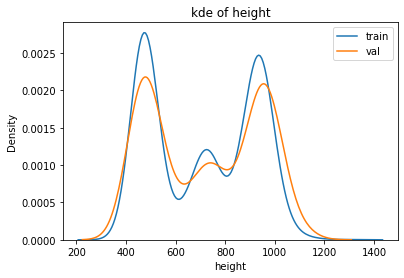

In [13]:
# width 는 1024로 고정되어 있음 height 에 따른 train, val kdeplot
sns.kdeplot(data = train_df['height'])
sns.kdeplot(data = val_df['height'])
plt.title('kde of height')
plt.legend(['train','val'])
plt.show()

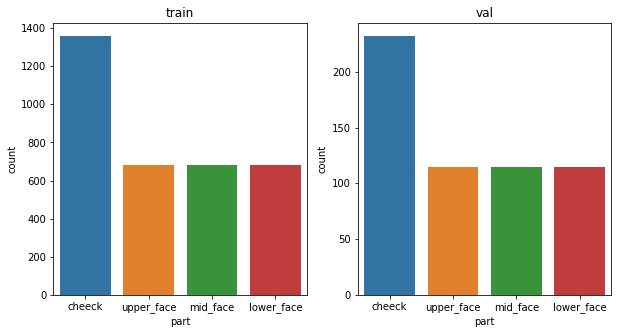

In [14]:
# train, val의 part별 분포
part_names = ['cheeck', 'upper_face', 'mid_face', 'lower_face']
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
sns.countplot(train_df['part'],ax=ax1)
sns.countplot(val_df['part'],ax=ax2)
ax1.set_title('train')
ax2.set_title('val')
ax1.set_xticklabels(part_names)
ax2.set_xticklabels(part_names)
plt.show()

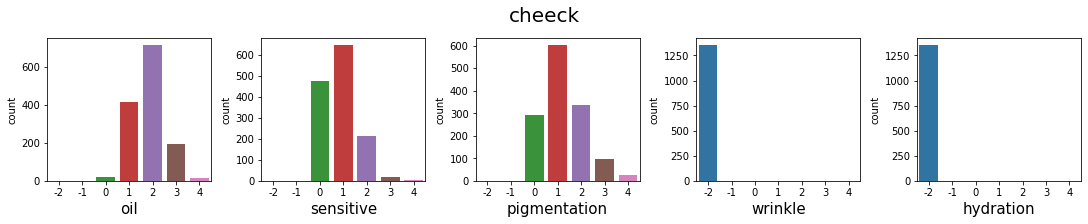

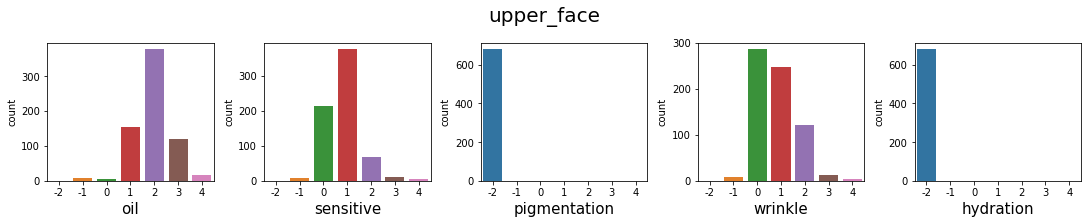

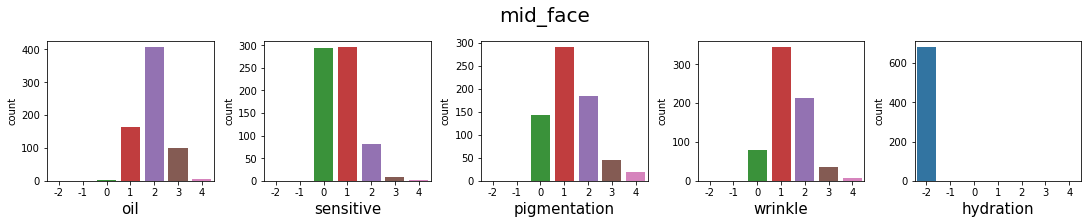

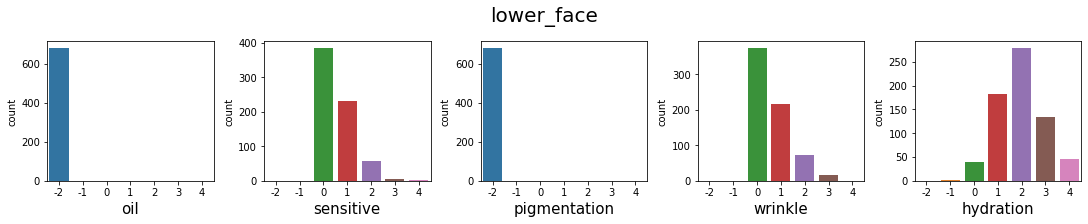

In [15]:
# trainset 각 카테고리별 점수 분포
for part in [0,1,2,3]:
    fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(15, 3),constrained_layout=True)
    for idx, item in enumerate(['oil','sensitive','pigmentation','wrinkle','hydration']):
        sns.countplot(train_df[train_df['part']==part][item], order = range(-2,5), ax = axes[idx])
        axes[idx].set_xlabel(item, fontsize = 15)
    fig.suptitle(part_names[part], fontsize=20)
    plt.show()

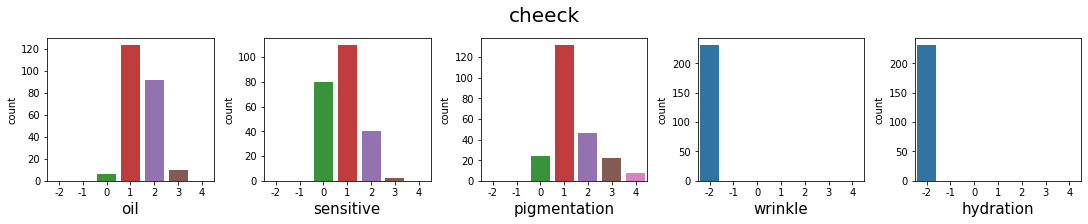

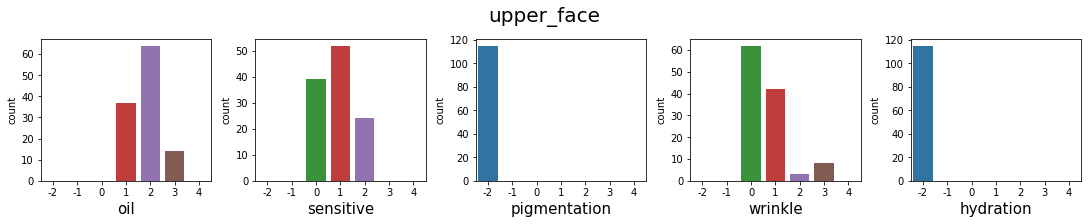

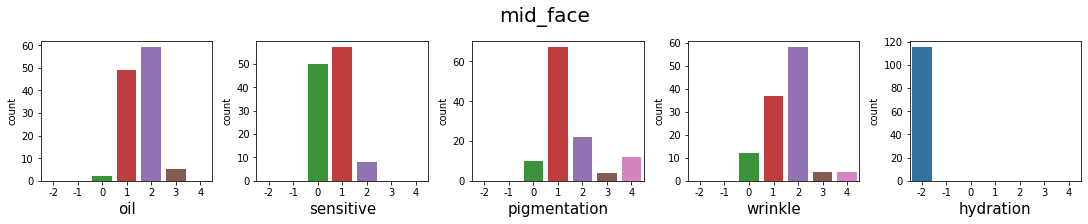

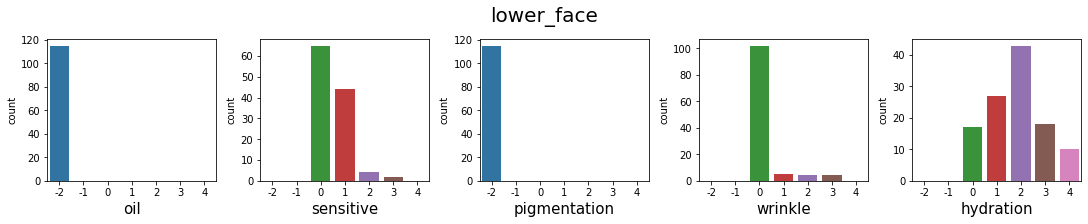

In [16]:
# validation set 각 카테고리별 점수 분포
part_names = ['cheeck', 'upper_face', 'mid_face', 'lower_face']
for part in [0,1,2,3]:
    fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(15, 3),constrained_layout=True)
    for idx, item in enumerate(['oil','sensitive','pigmentation','wrinkle','hydration']):
        sns.countplot(val_df[val_df['part']==part][item], order = range(-2,5), ax = axes[idx])
        axes[idx].set_xlabel(item, fontsize = 15)
    fig.suptitle(part_names[part], fontsize=20)
    plt.show()

In [30]:
corr_train = train_df.copy()
for i in range(len(train_df)):
    for cat in ['oil','sensitive','pigmentation','wrinkle','hydration']:
        if train_df[cat][i] < 0:
            corr_train[cat][i] = None
corr_val = val_df.copy()
for i in range(len(val_df)):
    for cat in ['oil','sensitive','pigmentation','wrinkle','hydration']:
        if val_df[cat][i] < 0:
            corr_val[cat][i] = None

In [31]:
corr_train.describe()

,width,height,part,oil,sensitive,pigmentation,wrinkle,hydration
count,3398.0,3398.000000,3398.000000,2710.000000,3390.000000,2038.000000,2031.000000,679.000000
mean,1024.0,710.293996,1.200706,1.887823,0.759292,1.249755,0.917282,1.942563
std,0.0,211.878142,1.166342,0.707993,0.745911,0.943644,0.859059,0.981210
min,1024.0,332.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1024.0,488.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
50%,1024.0,722.000000,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000
75%,1024.0,923.000000,2.000000,2.000000,1.000000,2.000000,1.000000,3.000000
max,1024.0,1309.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000


In [37]:
corr_val.describe()

,width,height,part,oil,sensitive,pigmentation,wrinkle,hydration
count,577.0,577.000000,577.000000,462.000000,577.000000,347.000000,345.000000,115.000000
mean,1024.0,724.610052,1.195841,1.573593,0.740035,1.420749,0.805797,1.800000
std,0.0,219.085002,1.167314,0.636895,0.705884,0.968538,0.976450,1.140945
min,1024.0,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1024.0,489.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
50%,1024.0,738.000000,1.000000,2.000000,1.000000,1.000000,0.000000,2.000000
75%,1024.0,944.000000,2.000000,2.000000,1.000000,2.000000,1.000000,2.000000
max,1024.0,1124.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000


In [46]:
corr_train[['oil','sensitive','pigmentation','wrinkle','hydration']].corr()

,oil,sensitive,pigmentation,wrinkle,hydration
oil,1.000000,0.133035,-0.080559,-0.069456,NaN
sensitive,0.133035,1.000000,-0.141200,-0.123241,-0.049455
pigmentation,-0.080559,-0.141200,1.000000,0.219395,NaN
wrinkle,-0.069456,-0.123241,0.219395,1.000000,0.001395
hydration,NaN,-0.049455,NaN,0.001395,1.000000


In [47]:
corr_val[['oil','sensitive','pigmentation','wrinkle','hydration']].corr()

,oil,sensitive,pigmentation,wrinkle,hydration
oil,1.000000,0.247426,-0.302494,-0.355184,NaN
sensitive,0.247426,1.000000,-0.034988,-0.148873,-0.228090
pigmentation,-0.302494,-0.034988,1.000000,0.162026,NaN
wrinkle,-0.355184,-0.148873,0.162026,1.000000,0.182905
hydration,NaN,-0.228090,NaN,0.182905,1.000000
